In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
import dataset_class as dc
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np

In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True,cutoff=50):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,cutoff)

In [3]:
#data = load_dataset('synth_data/synth_case1.csv',Nmax=1000)
#th_gt = params2theta(torch.tensor((1e3,5e3)),torch.tensor((100,300)),torch.tensor((.5,.5)))
data = load_dataset('synth_data/synth_case2.csv',Nmax=1000)
th_gt = params2theta(torch.tensor((1000,5000,10000)),torch.tensor((100,300,800)),torch.tensor((.4,.2,.4)))
#data = load_dataset('synth_data/synth_case3.csv',Nmax=1000)
#th_gt = params2theta(torch.tensor((5e3,1e4)),torch.tensor((300,800)),torch.tensor((.4,.6)))
#data = load_dataset('synth_data/synth_case4.csv',Nmax=1000)
#th_gt = params2theta(torch.tensor((1500,4000,6000)),torch.tensor((200,200,200)),torch.tensor((1/3,1/3,1/3)))
data = load_dataset('synth_data/synth_case5.csv',Nmax=1000)
th_gt = params2theta(torch.tensor((1e3,2.5*1e3,7*1e3)),torch.tensor((100,300,500)),torch.tensor((2/6,1/2,1/6)))
#data = load_dataset('synth_data/synth_case6.csv',Nmax=1000)
#th_gt = params2theta(torch.tensor((100,120,300)),torch.tensor((10,25,50)),torch.tensor((2/6,1/2,1/6)))
#data = load_dataset('synth_data/synth_case7.csv',Nmax=1000)
#th_gt = params2theta(torch.tensor((1000,3000,9000)),torch.tensor((100,500,1500)),torch.tensor((4/12,5/12,3/12)))

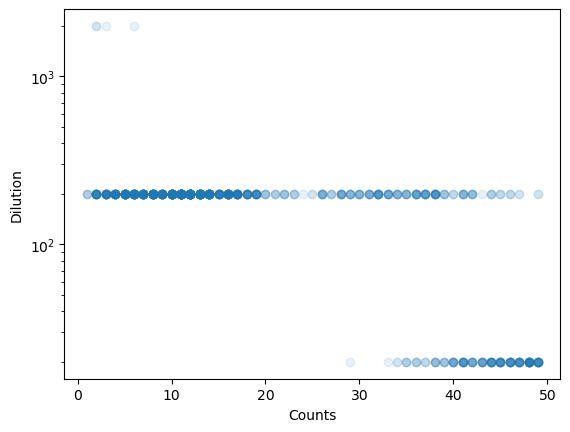

In [4]:
plt.scatter(data.counts.reshape(-1),data.dils.reshape(-1),alpha=.1)
plt.yscale('log')
plt.xlabel('Counts')
plt.ylabel('Dilution')
plt.savefig('graphs/synth/nonparam_densities_{}.png'.format(th_gt.numpy()))

In [5]:
data.loglike(th_gt,th_gt.size(0)//3).sum()

tensor(-3783.8362, dtype=torch.float64)

In [6]:
data.evaluate(th_gt.size(0)//3,tol=1e-5)

Iteration 1, x = [ 6.78642771  7.76249612  8.81075375 -1.40939128 -1.1447643  -1.57737505
 -1.23196885 -0.6074353  -1.80561898], f(x) = 3.894860227302365
Iteration 2, x = [ 6.79640089  7.75257805  8.80210041 -1.419403   -1.15474603 -1.58734852
 -1.24194093 -0.5975001  -1.81464081], f(x) = 3.8871711756313347
Iteration 3, x = [ 6.80632567  7.74282884  8.79732208 -1.42943265 -1.16469344 -1.59727573
 -1.25186317 -0.58768462 -1.82077557], f(x) = 3.880343286566312
Iteration 4, x = [ 6.8161774   7.73337757  8.79684298 -1.43948499 -1.17458635 -1.60715193
 -1.26170877 -0.57804319 -1.82266929], f(x) = 3.874268192092184
Iteration 5, x = [ 6.82592824  7.72440933  8.79902789 -1.44956332 -1.18440003 -1.61698855
 -1.27144387 -0.56862358 -1.82106784], f(x) = 3.8688138312445814
Iteration 6, x = [ 6.83554708  7.71616862  8.80252241 -1.45966941 -1.1941056  -1.62680097
 -1.28102708 -0.55947076 -1.81716327], f(x) = 3.8639697785983254
Iteration 7, x = [ 6.84499962  7.70894446  8.8062874  -1.46980355 -1.2036

(tensor([1012.7809, 2484.2823, 6903.1219], dtype=torch.float64),
 tensor([ 89.7450, 295.3371, 473.4807], dtype=torch.float64),
 tensor([0.3402, 0.5032, 0.1566], dtype=torch.float64))

In [7]:
data.evaluate(tol=1e-5)

Iteration 1, x = [ 7.87739764 -0.24326151  0.        ], f(x) = 4.138017183152589
Iteration 2, x = [ 7.86747096 -0.24265023  0.        ], f(x) = 4.135917469177286
Iteration 3, x = [ 7.85763987 -0.23711482  0.        ], f(x) = 4.134106563987131
Iteration 4, x = [ 7.84792261 -0.22977311  0.        ], f(x) = 4.132404325332433
Iteration 5, x = [ 7.8383406  -0.22151175  0.        ], f(x) = 4.130809887908318
Iteration 6, x = [ 7.82891767 -0.2126824   0.        ], f(x) = 4.129324176325765
Iteration 7, x = [ 7.81967907 -0.20345807  0.        ], f(x) = 4.127944368207419
Iteration 8, x = [ 7.81065048 -0.19393645  0.        ], f(x) = 4.126665415185733
Iteration 9, x = [ 7.80185701 -0.1841786   0.        ], f(x) = 4.1254808758564865
Iteration 10, x = [ 7.79332223 -0.17422602  0.        ], f(x) = 4.124383417443858
Iteration 11, x = [ 7.78506709 -0.16410931  0.        ], f(x) = 4.123365205174538
Iteration 12, x = [ 7.77710889 -0.15385301  0.        ], f(x) = 4.122418258026948
Iteration 13, x = [ 7.76

(tensor([1013.0541, 2485.0307, 6902.8547], dtype=torch.float64),
 tensor([ 90.0412, 293.0248, 472.9914], dtype=torch.float64),
 tensor([0.3405, 0.5028, 0.1567], dtype=torch.float64))

In [8]:
probs = lambda theta: torch.exp(dc.Igaussmix_loglike(data.n[1:],*theta2params(theta,theta.size(0)//3)))
probs_sep = lambda m,s,r: torch.exp(dc.Igaussmix_loglike(data.n[1:],m,s,r))

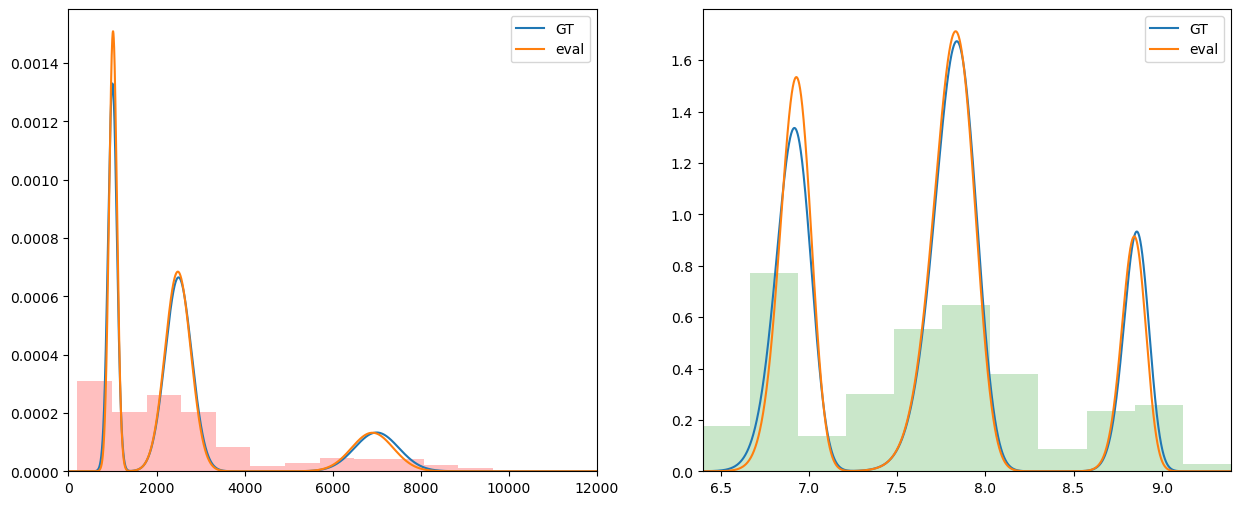

In [9]:
fig,ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(probs(th_gt), label='GT')
#ax[0].plot(probs_sep(*data.ML_estimated),label='OLD')
ax[0].plot(probs_sep(*data.ev),label='eval')
ax[0].hist(data.ML,alpha=.25,bins=15,density=True,color='r')
ax[0].set_xlim(0,data.ML.max())
ax[0].legend()

x = torch.log(data.n[1:])
ax[1].plot(x,probs(th_gt)*torch.exp(x), label='GT')
#ax[1].plot(x,probs_sep(*data.ML_estimated)*torch.exp(x),label='OLD')
ax[1].plot(x,probs_sep(*data.ev)*torch.exp(x),label='eval')
ax[1].hist(torch.log(torch.tensor(data.ML.reshape(-1))),alpha=.25,bins=15,density=True)
ax[1].set_xlim(np.log(np.percentile(data.ML,3)),np.log(data.ML.max()))
ax[1].legend()
plt.savefig('graphs/synth/comparing densities_{}.png'.format(th_gt.numpy()))

In [10]:
import synth_data.cases as cs
import numpy as np 

In [11]:
make_case = lambda x,name: cs.case(*[xi.numpy() for xi in x],name)
case_gt = make_case(theta2params(th_gt,th_gt.size(0)//3),'cml')
x = case_gt.sample_data(100000)
case_ev = make_case(data.ev,'cev')
x_ev = case_ev.sample_data(100000)

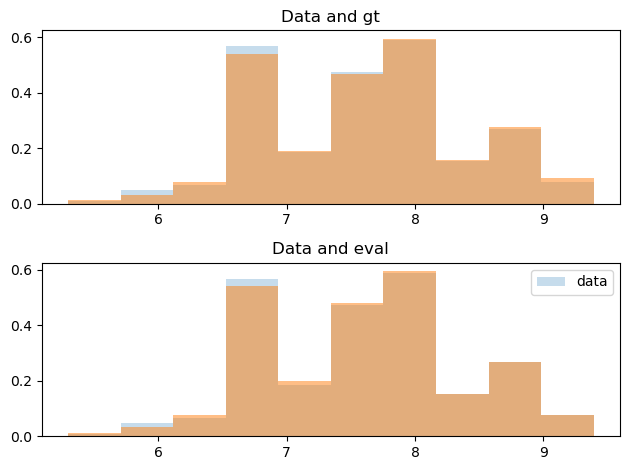

In [12]:
fig,ax = plt.subplots(2)
b = ax[0].hist(torch.log(torch.tensor(data.ML.reshape(-1))),alpha=.25,density=True,label='data')
ax[0].hist(np.log((x[0]*x[1])[x[0]>0]),bins=b[1],alpha=.5,density=True)
ax[0].set_title('Data and gt')

ax[1].hist(torch.log(torch.tensor(data.ML.reshape(-1))),alpha=.25,density=True,label='data')
ax[1].hist(np.log((x_ev[0]*x_ev[1])[x_ev[0]>0]),density=True,alpha=.5,bins=b[1])

ax[1].set_title('Data and eval')


plt.savefig('graphs/synth/comparing_fits_{}.png'.format(th_gt.numpy()))
plt.legend()
plt.tight_layout()

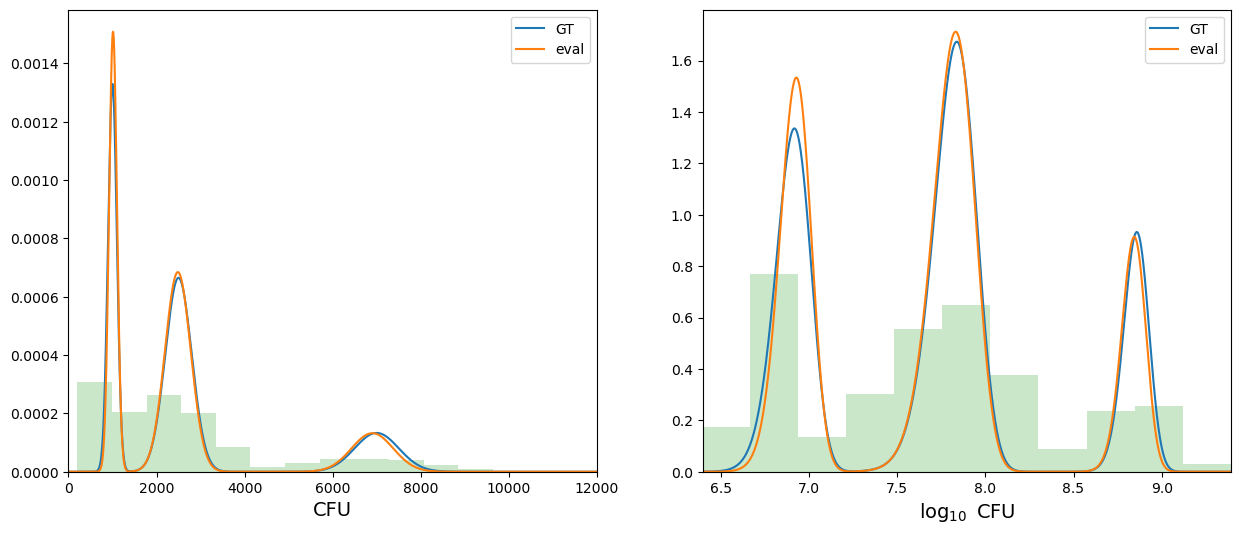

In [13]:
fig,ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(probs(th_gt), label='GT')
#ax[0].plot(probs_sep(*data.ML_estimated),label='OLD')
ax[0].plot(probs_sep(*data.ev),label='eval')
ax[0].hist(data.ML,alpha=.25,bins=15,density=True)
ax[0].set_xlim(0,data.ML.max())
ax[0].set_xlabel(r'CFU',fontsize=14)
ax[0].legend()

x = torch.log(data.n[1:])
ax[1].plot(x,probs(th_gt)*torch.exp(x), label='GT')
#ax[1].plot(x,probs_sep(*data.ML_estimated)*torch.exp(x),label='OLD')
ax[1].plot(x,probs_sep(*data.ev)*torch.exp(x),label='eval')
ax[1].hist(torch.log(torch.tensor(data.ML.reshape(-1))),alpha=.25,bins=15,density=True)
ax[1].set_xlim(np.log(np.percentile(data.ML,3)),np.log(data.ML.max()))
ax[1].legend()
ax[1].set_xlabel(r'$\log_{10}$ CFU',fontsize=14)

plt.savefig('graphs/synth/nonparam_densities_{}.png'.format(th_gt.numpy()))

In [14]:
m,s,r = [x.numpy() for x in data.ev]
with open('graphs/synth/report_{}.txt'.format(th_gt.numpy()), 'w') as file:
    file.write(f"Gaussian components  means :{m}\n")
    file.write(f"Gaussian components  stdev :{s}\n")
    file.write(f"Gaussian components weights:{r}\n")
